# Project: Investigate a Dataset - No show medical appointment in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

The goal of this document is to investigate a dataset containing the presence or not of a patient to a medical appointment in Brazil.

The primary source of the dataset was Kaggle ([link](https://www.kaggle.com/joniarroba/noshowappointments)). The exact link of the dataset will be given below.

In [1]:
#Import python libraries
import sys
import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Check of the versions of Python and the different modules used to ease reproductibility.

In [2]:
print("Version of Python: %s"%(sys.version))
print("Version of sys: sys is a python embedded module. Please refer to the python's version.")
print("Version of datetime: datetime is a python embedded module. Please refer to the python's version.")
print("Version of pandas: %s"%(pd.__version__))
print("Version of matplotlib :%s"%(matplotlib.__version__))
print("Version of seaborn: %s"%(sns.__version__))

Version of Python: 2.7.13 |Anaconda custom (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]
Version of sys: sys is a python embedded module. Please refer to the python's version.
Version of datetime: datetime is a python embedded module. Please refer to the python's version.
Version of pandas: 0.19.2
Version of matplotlib :2.0.0
Version of seaborn: 0.7.1


<a id='wrangling'></a>
## Data Wrangling

<a id='general_properties'></a>
### General Properties

The dataset used for this analysis was originated from this place: [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)

In [3]:
# Import the dataset
noshowapp_df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

We can now have a first look on the content of the data. Here are the first 5 rows.

In [4]:
noshowapp_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


A list of all columns:

In [5]:
noshowapp_df.columns

Index([u'PatientId', u'AppointmentID', u'Gender', u'ScheduledDay',
       u'AppointmentDay', u'Age', u'Neighbourhood', u'Scholarship',
       u'Hipertension', u'Diabetes', u'Alcoholism', u'Handcap',
       u'SMS_received', u'No-show'],
      dtype='object')

A count of each non null element of each column.

In [6]:
noshowapp_df.count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

We can see that no column constains empty elements. We have 110527 entries in the dataset.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

#### Cleaning the Columns

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


The column named "Hipertension" and "Handcap" seem to bewrongly ortografied.

In portugese hypertension is hipertensao. The error seems to be a wrong translation. We will replace  the column name "Hipertension" by "Hypertention".

After research, the word "Handcap" does not exist. In a portugese dictionnary nothing can justify this wording. Here we decide to rename the colunm "Handcap" by "Handicap".

In [8]:
# Rename the column Hipertension and Handcap by the correct wording.
noshowapp_df = noshowapp_df.rename(index=str, columns={"Hipertension": "Hypertension", "Handcap": "Handicap"})

In [9]:
noshowapp_df.columns

Index([u'PatientId', u'AppointmentID', u'Gender', u'ScheduledDay',
       u'AppointmentDay', u'Age', u'Neighbourhood', u'Scholarship',
       u'Hypertension', u'Diabetes', u'Alcoholism', u'Handicap',
       u'SMS_received', u'No-show'],
      dtype='object')

Now the columns are less confusing.

#### Cleaning the Rows

We will review each rows to see if they contains strange values.

##### PatientId

Check of the limit of the patient ID.

In [10]:
noshowapp_df['PatientId'].min()

39217.844389999998

In [11]:
noshowapp_df['PatientId'].max()

999981631772427.0

The Patient IDs are quite huge and it seems to have a problem in the import of the file. After check in the CSV file, some patient ID are noted in an exponential notation.

It seems to have to multiply the wrong IDs by 10E5.

Let find the faulty IDs and correct the values.

In [12]:
noshowapp_df.loc[noshowapp_df['PatientId'] < 5000000]['PatientId']

3950       93779.52927
73228     537615.28476
73303     141724.16655
100517     39217.84439
105430     43741.75652
Name: PatientId, dtype: float64

By trying some limit value we find those 5 values which have a strange number.

Before correct the value, we have to check if the values does not exists in the table and check if they can be related to the same person.

In [13]:
def correctPatientID(patientID):
    '''
    Check if a patient ID is present is the database with the ID*10E5.
    If not correct the row in the dataset.
    If yes display a message for further investigation
    '''
    newPatientID = float(int(patientID*10E5))
    result = noshowapp_df.loc[noshowapp_df['PatientId'] == newPatientID]
    if result.shape[0] > 0:
        print("Match found for patientID %.1f"%(patientID))
        print(result)
        print("----------------------------------------")
    else:
        print("No match found for patient ID %.1f"%(patientID))
        print("Correct the value. PatientID %.1f becomes %.1f"%(patientID, newPatientID))
        noshowapp_df.loc[(noshowapp_df['PatientId'] == patientID),(['PatientId'])] = newPatientID
        print("")

patientIDtoCheck = noshowapp_df.loc[noshowapp_df['PatientId'] < 5000000]['PatientId']
res = patientIDtoCheck.apply(correctPatientID)

No match found for patient ID 93779.5
Correct the value. PatientID 93779.5 becomes 93779529270.0

No match found for patient ID 537615.3
Correct the value. PatientID 537615.3 becomes 537615284760.0

No match found for patient ID 141724.2
Correct the value. PatientID 141724.2 becomes 141724166550.0

No match found for patient ID 39217.8
Correct the value. PatientID 39217.8 becomes 39217844390.0

No match found for patient ID 43741.8
Correct the value. PatientID 43741.8 becomes 43741756519.0



By luck no duplicates were found and all patient IDs are now corrected.
Let check if it is really the case:

In [14]:
noshowapp_df.loc[noshowapp_df['PatientId'] < 5000000]['PatientId']

Series([], Name: PatientId, dtype: float64)

The result is an empty serie. The IDs are now corrected.

How many patients are registered in the dataset. some patients can have more than one appointment.

In [15]:
len(noshowapp_df['PatientId'].unique())

62299

62299 unique patients are in the dataset.

#### AppointmentID

Check the limit of the data contains in column "AppointmentID"

In [16]:
noshowapp_df['AppointmentID'].min()

5030230

In [17]:
noshowapp_df['AppointmentID'].max()

5790484

For this column the limits make sense.

Each ID should be unique. Let check that.

In [18]:
len(noshowapp_df['AppointmentID'].unique())

110527

All Appointment IDs are unique. This row seems to be clean.

##### Gender

Which gender do we have in this column. Only Male and Female?

In [19]:
noshowapp_df['Gender'].unique()

array(['F', 'M'], dtype=object)

No creativity here. We have only male and female.

##### Scheduled day

This column indicate when the patient call for his/her appointment.

Let have a look on the format:

In [20]:
noshowapp_df['ScheduledDay'].head()

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

The format is a string and should be converted.

In [21]:
def convertDate(str):
    return datetime.datetime.strptime(str, '%Y-%m-%dT%H:%M:%SZ')

noshowapp_df['ScheduledDay'] = noshowapp_df['ScheduledDay'].apply(convertDate)

Let see what we have for data recorded.

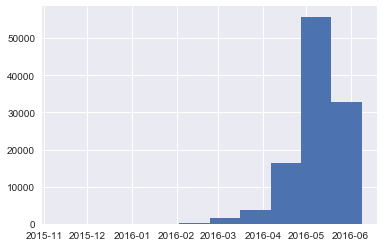

In [22]:
noshowapp_df['ScheduledDay'].hist()

The repartition of the data is quite strange. It seems that data were collected more or less during 3 month. This will exclude an analysis of seasonal variations.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!